<a href="https://colab.research.google.com/github/JangAyeon/ToBigs/blob/master/%5B8%5DNLP_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP 기초 Assignment
## NLP 제대로 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [ ]:
# 필요한 모듈 불러오기
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

# Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 8주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [ ]:
spam = pd.read_csv('spam.csv')

In [ ]:
spam["v2"]=spam["v2"].str.lower() #알파벳으로 소문자로 변환해 복잡도를 낮춤

In [ ]:
spam.head()

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
spam.shape #data 크기

(5572, 2)

In [ ]:
spam.iloc[5]['v2']

"freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv"

In [ ]:
spam.isnull().sum() #공백 없음

v1    0
v2    0
dtype: int64

In [ ]:
spam.groupby("v1").describe() 
#총 5572개 : 일반 문자(4825개), 스팸문자(747개)
#일반 문자에서 "sorry, i'll cal later"가 30번이나 중복됨됨

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4515                             sorry, i'll call later   30
spam   747    653  please call our customer service representativ...    4

In [ ]:
spam["len"]=spam.v2.apply(len)
spam["len"].describe() 
#한 문자 평균 길이 : 80
# 최단 문자 : 2, 최장 문자 : 910
spam.drop(["len"],axis=1,inplace=True)

# Tokenizing
- 실습코드에서는 한국어 대상이라 konlpy를 다뤘지만, 영어는 nltk 모듈을 쓸 수 있습니다. 의미 있는 토큰으로 쪼개고 불용어도 처리해보세요! 현존하는 불용어 리스트를 사용해도 좋고, 새롭게 만들어도 좋습니다. 특수문자는 없애주고, 모두 소문자로 변환해주는 전처리도 필요하겠죠?

##**적절한 Tokenizing 기법 선택**

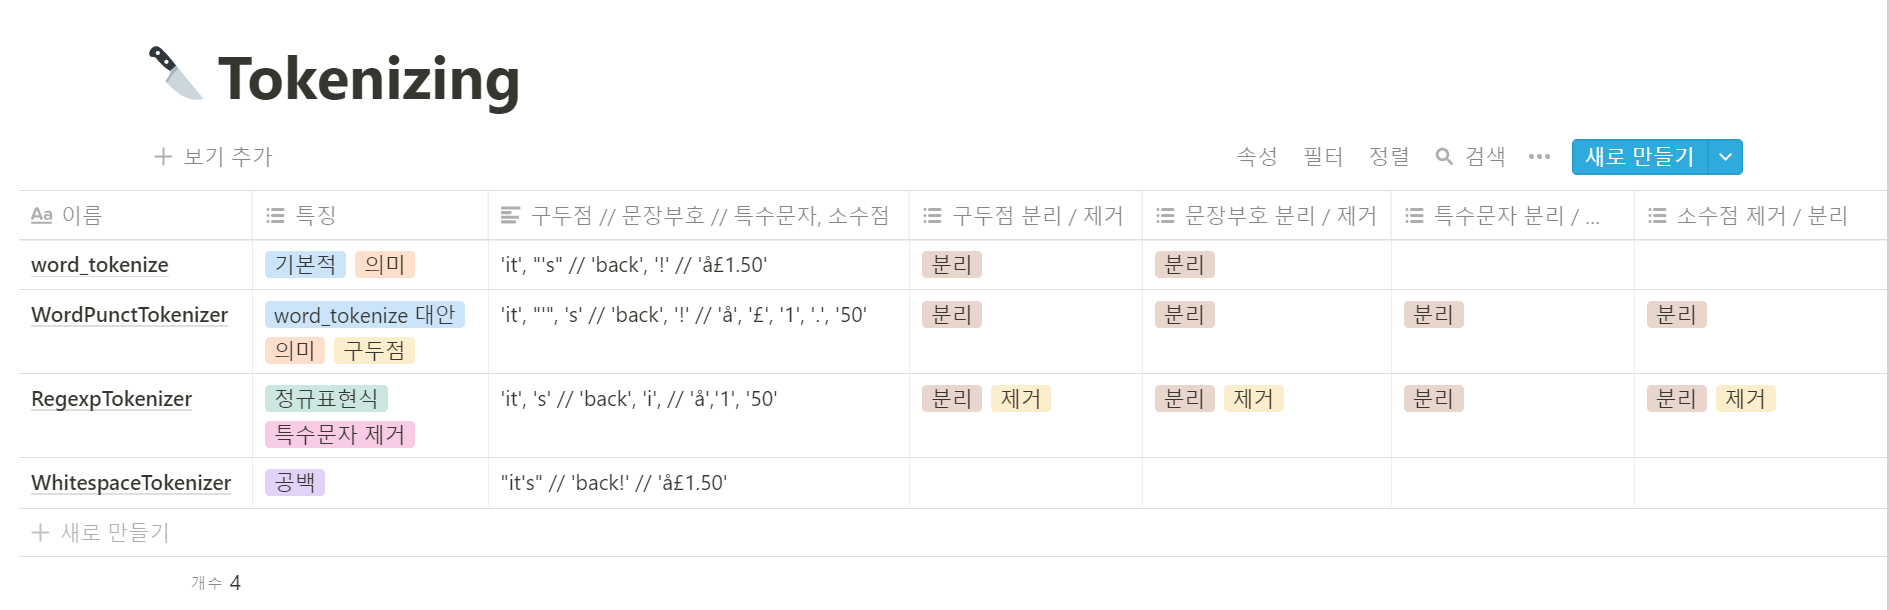

**word_tokenize 사용**<br>
소수점까지 분리/제거하는 `WordPunctTokenizer`보다는 `word_tokenize`를 이용해 단어를 분리하고 따로 특수문자 제거 과정을 거치고자함

In [ ]:
#nltk.tokenize 모듈 불러오기
import nltk
from nltk.tokenize import word_tokenize #[1]word_tokenize
from nltk.tokenize import WordPunctTokenizer #[2]WordPunctTokenizer
from nltk.tokenize import RegexpTokenizer #[3]RegexpTokenizer
from nltk.tokenize import WhitespaceTokenizer #[4]WhitespaceTokenizer

In [ ]:
#같은 줄에 tokenize 모듈을 돌려보며 슬라이싱 되는 양상 관찰

nltk.download('punkt') #[1]word_tokenize 결과
print("\n[1]word_tokenize")
print(word_tokenize(spam.iloc[5]['v2']),"\n")


print("\n[2]WordPunctTokenizer") #[2]WordPunctTokenizer 결과
tokenizer=WordPunctTokenizer()
print(tokenizer.tokenize(spam.iloc[5]["v2"]))

print("\n[3]RegexpTokenizer") #[3]RegexpTokenizer 결과
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(spam.iloc[5]['v2']))

print("\n[4]WhitespaceTokenizer") #[4]WhitespaceTokenizer
tokenizer=WhitespaceTokenizer()
print(tokenizer.tokenize(spam.iloc[5]['v2']))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!

[1]word_tokenize
['freemsg', 'hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'i', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'tb', 'ok', '!', 'xxx', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv'] 


[2]WordPunctTokenizer
['freemsg', 'hey', 'there', 'darling', 'it', "'", 's', 'been', '3', 'week', "'", 's', 'now', 'and', 'no', 'word', 'back', '!', 'i', "'", 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'tb', 'ok', '!', 'xxx', 'std', 'chgs', 'to', 'send', ',', 'å', '£', '1', '.', '50', 'to', 'rcv']

[3]RegexpTokenizer
['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'å', '1', '50', 'to', 

##**Text -> Word 과정**<br>
1. 특수문자와 분리되어 의미로서 기능 상실한 단순한 숫자를 삭제 -> 복잡성을 낮춤
2. `word_tokenize` 모듈 이용하여 단어 단위로 자름
3. 불용언 제거
4. 표제어로 바꿈

In [ ]:
#전체 과정에 필요한 묘듈

import re #[step1]특수문자와 분리되어 의미로서 기능 상실한 단순한 숫자를 삭제

import nltk #[step2]word_tokenize
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

from nltk.corpus import stopwords #[step3]불용언 제거
nltk.download('stopwords') 
not_word = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer #[step4]표제어로
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#전체 data에 적용

all_txt_token = []
for i in range(len(spam)):
    one_line_token = re.sub('[^a-zA-Z]', ' ', spam.iloc[i]['v2'])  #[step1]특수문자 & 숫자 삭제
    one_line_token = word_tokenize(one_line_token)  #[step2]word_tokenize
    one_line_token = [word for word in one_line_token if word not in not_word]  #[step3]불용언 제거
    one_line_token = [lemmatizer.lemmatize(word) for word in one_line_token]  #[step4]표제어로
    all_txt_token.append(one_line_token)


In [ ]:
all_txt_token

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  'apply'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  

In [ ]:
spam.insert(2,"Real_word",all_txt_token)

In [ ]:
spam.head()

,v1,v2,Real_word
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, go, usf, life, around, though]"


# Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

#**[1] Insight**

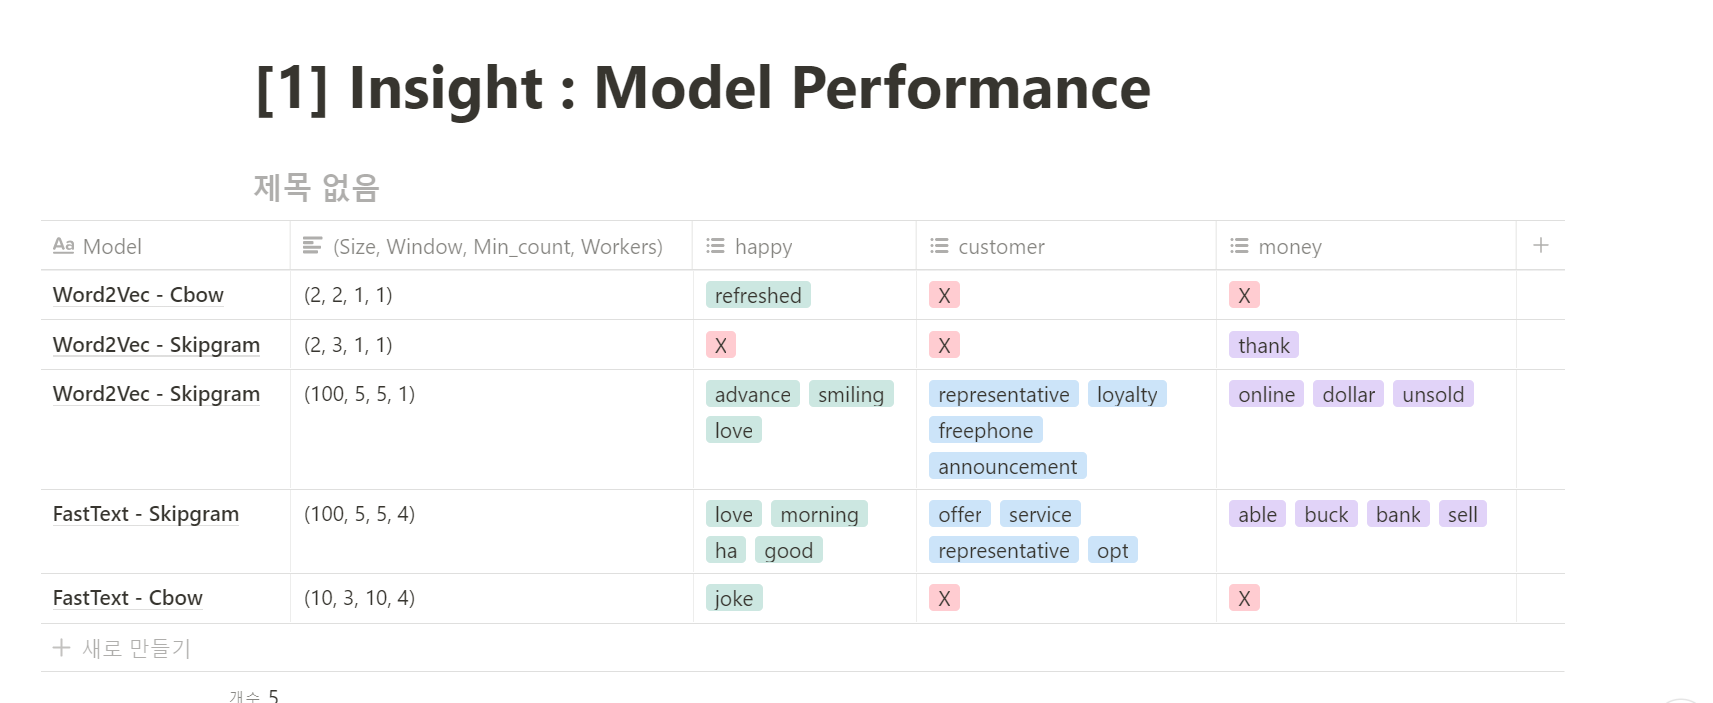

* Skipgram보다 FastText가 성능/속도면에서 더 우수함
* Size의 임베딩 차원을 높이고, min_count를 적절히 설정해 관련 단어 내 유사도 측정이 쉬움

**Word2Vec Parameters**
* size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원<br>
* window = 컨텍스트 윈도우 크기<br>
* min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습X)<br>
* workers = 학습을 위한 프로세스 수<br>
* sg = 0는 CBOW, 1은 Skip-Gram<br>

In [ ]:
from gensim.models import Word2Vec
#[1]Word2Vec(Cbow)
CBOW_1= Word2Vec(all_txt_token, size=2, window=2, #결과...어이없음
                min_count=1, workers=1, iter=1000, sg=0)

In [ ]:
CBOW_1.most_similar('happy', topn=5) #refreshed

[('egg', 1.0),
 ('scratch', 0.9999999403953552),
 ('culture', 0.9999997019767761),
 ('refreshed', 0.999999463558197),
 ('finishing', 0.9999991059303284)]

In [ ]:
CBOW_1.most_similar('customer', topn=5) #없음

[('mths', 1.0),
 ('december', 1.0),
 ('american', 1.0),
 ('parish', 1.0),
 ('ntt', 1.0)]

In [ ]:
CBOW_1.most_similar('money', topn=5 )#없음

[('dang', 0.9999997019767761),
 ('sprint', 0.999999463558197),
 ('bb', 0.9999992847442627),
 ('care', 0.9999992251396179),
 ('inperialmusic', 0.9999980330467224)]

In [ ]:
#[2]Word2Vec(Skipgram)
Skip_Gram_1= Word2Vec(all_txt_token, size=2, window=3, #window는 3로 바꿈
                min_count=1, workers=1, iter=1000, sg=1) # Skip_Gram 이용 바꿈

In [ ]:
Skip_Gram_1.most_similar('happy', topn=5) #없음

[('hitler', 1.0),
 ('breakfast', 1.0),
 ('roger', 1.0),
 ('understood', 0.9999999403953552),
 ('gota', 0.9999999403953552)]

In [ ]:
Skip_Gram_1.most_similar('customer', topn=5) #없음

[('gauti', 1.0), ('q', 1.0), ('psp', 1.0), ('public', 1.0), ('pretsovru', 1.0)]

In [ ]:
Skip_Gram_1.most_similar('money', topn=5) #thank

[('boyfriend', 1.0),
 ('outreach', 1.0),
 ('sarasota', 0.9999998807907104),
 ('thank', 0.9999998807907104),
 ('tat', 0.9999997019767761)]

In [ ]:
#[3]Word2Vec(Skipgram)
Skip_Gram_2= Word2Vec(all_txt_token, size=100, window=5, #size는 100으로 늘림, window는 5로 늘림, min_count는 5로 늘림
                min_count=5, workers=1, iter=1000, sg=1)

In [ ]:
Skip_Gram_2.most_similar('happy', topn=5) #advance,smiling,love

[('cabin', 0.4650072753429413),
 ('across', 0.4424664378166199),
 ('advance', 0.3950653672218323),
 ('smiling', 0.3808223605155945),
 ('love', 0.3755178451538086)]

In [ ]:
Skip_Gram_2.most_similar('customer', topn=5) #representative, loyalty, freephone, announcement

[('representative', 0.6407099366188049),
 ('loyalty', 0.6103017330169678),
 ('freephone', 0.5879412889480591),
 ('announcement', 0.5443373322486877),
 ('experience', 0.4734984338283539)]

In [ ]:
Skip_Gram_2.most_similar('money', topn=5) #online, dollar, unsold

[('aint', 0.3849904537200928),
 ('online', 0.3616045117378235),
 ('dollar', 0.35884755849838257),
 ('decided', 0.35525956749916077),
 ('unsold', 0.35064566135406494)]

In [ ]:
from gensim.models import FastText
#[4]FastText(Skipgram)
fastext_1 = FastText(all_txt_token, size=100, window=5, 
                     min_count=5, workers=4, sg=1)

In [ ]:
fastext_1.most_similar('happy', topn=5) #love, morining, ha, good

[('love', 0.9844249486923218),
 ('morning', 0.9836702346801758),
 ('ha', 0.9828768968582153),
 ('happen', 0.9821313619613647),
 ('good', 0.9820029735565186)]

In [ ]:
fastext_1.most_similar('customer', topn=5) #offer, service, representative, opt

[('offer', 0.9970612525939941),
 ('service', 0.9968776702880859),
 ('camera', 0.9966621398925781),
 ('representative', 0.9954378604888916),
 ('opt', 0.9953393340110779)]

In [ ]:
fastext_1.most_similar('money', topn=5) #able, buck, bank, sell

[('able', 0.9969460964202881),
 ('mu', 0.99592524766922),
 ('buck', 0.995912492275238),
 ('bank', 0.9958994388580322),
 ('sell', 0.9954532980918884)]

In [ ]:
#[5]FastText(Cbow)
fastext_2 = FastText(all_txt_token, size=10, window=3, 
                     min_count=10, workers=4, sg=0)

In [ ]:
fastext_2.most_similar('happy', topn=5) #joke

[('joke', 0.9998481273651123),
 ('thought', 0.9998465776443481),
 ('happen', 0.9997961521148682),
 ('though', 0.9997880458831787),
 ('driving', 0.9997825622558594)]

In [ ]:
fastext_2.most_similar('customer', topn=5) #없음

[('download', 0.9998955726623535),
 ('outside', 0.9998763799667358),
 ('motorola', 0.9998381733894348),
 ('computer', 0.9998346567153931),
 ('address', 0.9998104572296143)]

In [ ]:
fastext_2.most_similar('money', topn=5) #cover, best, rental

[('cover', 0.9999726414680481),
 ('might', 0.9999476075172424),
 ('computer', 0.9999289512634277),
 ('best', 0.9999226331710815),
 ('rental', 0.9999222159385681)]

본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

#**[2] Insight**

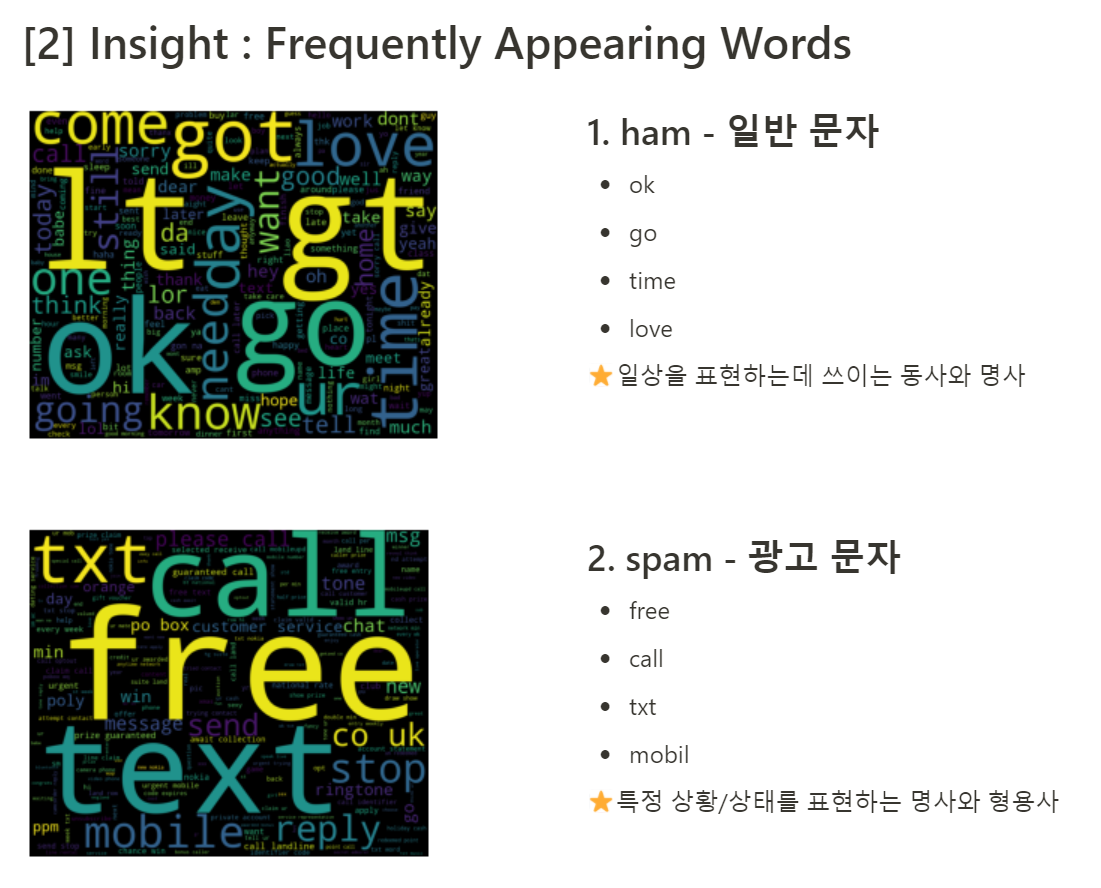

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
ham_idx=spam.loc[spam["v1"]=="ham"].index
ham_all=""
for idx in ham_idx:
  for line in all_txt_token[idx]:
    ham_all+=line+" "

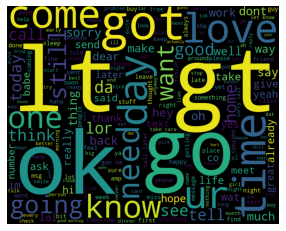

In [ ]:
WC = WordCloud(width=1000, height=800, background_color="black", random_state=0)
plt.imshow(WC.generate(ham_all))
plt.axis("off")
plt.show()

In [ ]:
spam_idx=spam[spam["v1"]=="spam"].index
spam_all=""
for idx in spam_idx:
  for line in all_txt_token[idx]:
    spam_all+=line+" "

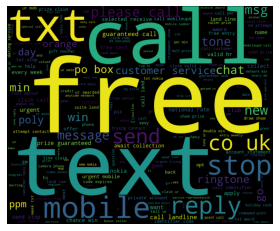

In [ ]:
WC = WordCloud(width=1100, height=900, background_color="black", random_state=0)
plt.imshow(WC.generate(spam_all))
plt.axis("off")
plt.show()

#**[3] Insight**

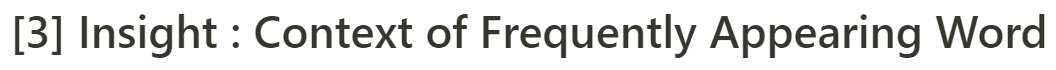

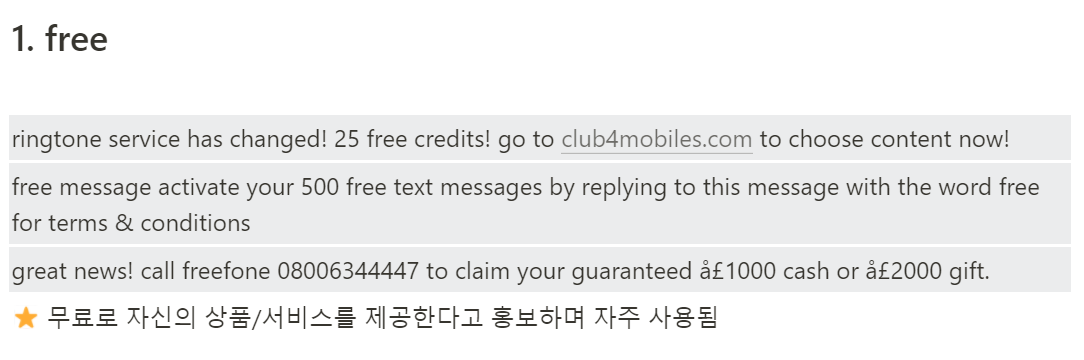

In [ ]:
for i in spam["v2"]:
  if "free" in i:
    print(i+"\n")

free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's

freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv

had your mobile 11 months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on 08002986030

urgent! you have won a 1 week free membership in our å£100,000 prize jackpot! txt the word: claim to no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18

07732584351 - rodger burns - msg = we tried to call you re your reply to our sms for a free nokia mobile + free camcorder. please call now 08000930705 for delivery tomorrow

congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! c suprman v, matrix3, starwars3, etc all 4 free! bx420-ip4-5we. 150pm. dont miss out! 

i am waiting machan. call me once you free

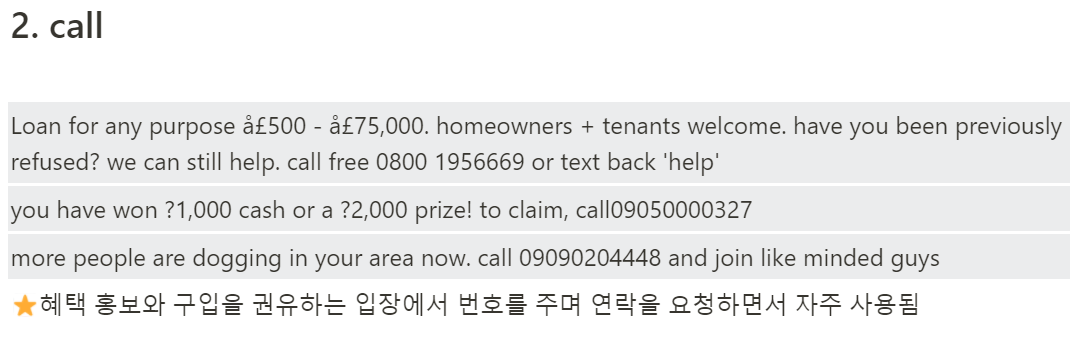

In [ ]:
for i in spam["v2"]:
  if "call" in i:
    print(i+"\n")

as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune

winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.

had your mobile 11 months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on 08002986030

07732584351 - rodger burns - msg = we tried to call you re your reply to our sms for a free nokia mobile + free camcorder. please call now 08000930705 for delivery tomorrow

no calls..messages..missed calls

congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! c suprman v, matrix3, starwars3, etc all 4 free! bx420-ip4-5we. 150pm. dont miss out! 

sorry, i'll call later in meeting.

as a valued customer, i am pleased to advise you that following recent review of your mob no. you are awarded with 

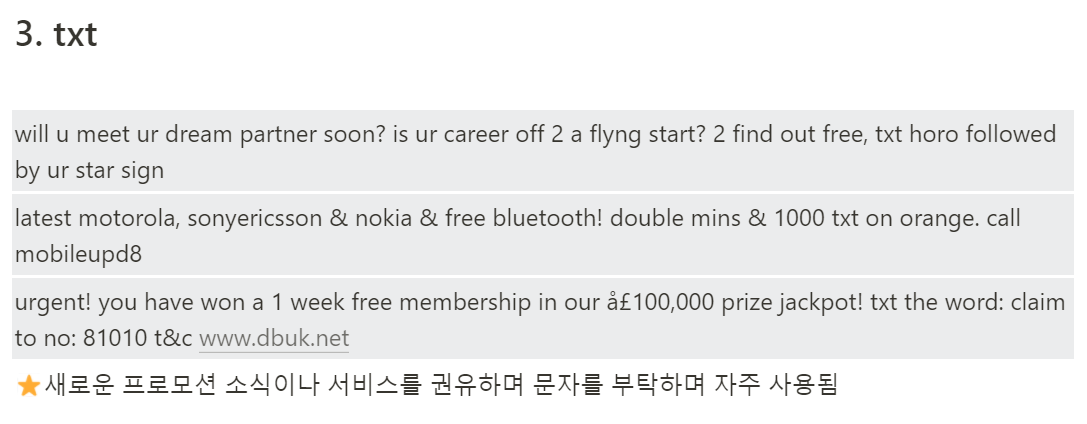

In [ ]:
for i in spam["v2"]:
  if "txt" in i:
    print(i+"\n")

free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's

six chances to win cash! from 100 to 20,000 pounds txt> csh11 and send to 87575. cost 150p/day, 6days, 16+ tsandcs apply reply hl 4 info

urgent! you have won a 1 week free membership in our å£100,000 prize jackpot! txt the word: claim to no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18

xxxmobilemovieclub: to use your credit, click the wap link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=qjkgighjjgcbl

england v macedonia - dont miss the goals/team news. txt ur national team to 87077 eg england to 87077 try:wales, scotland 4txt/ì¼1.20 poboxox36504w45wq 16+

urgent ur awarded a complimentary trip to eurodisinc trav, aco&entry41 or å£1000. to claim txt dis to 87121 18+6*å£1.50(morefrmmob. shracomorsglsuplt)10, ls1 3aj

sunshine quiz wkly q! win a top sony dvd player if u know which country the

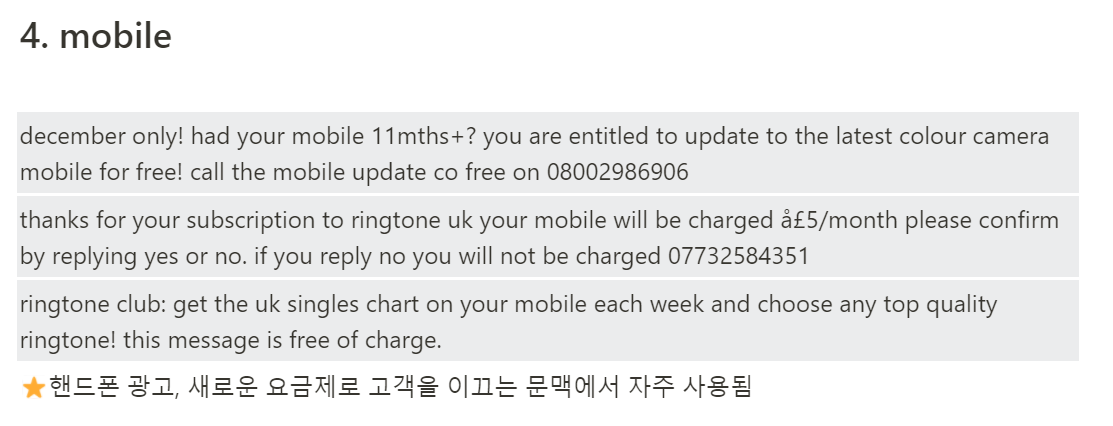

In [ ]:
for i in spam["v2"]:
  if "mobile" in i:
    print(i+"\n")

had your mobile 11 months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on 08002986030

xxxmobilemovieclub: to use your credit, click the wap link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=qjkgighjjgcbl

thanks for your subscription to ringtone uk your mobile will be charged å£5/month please confirm by replying yes or no. if you reply no you will not be charged

07732584351 - rodger burns - msg = we tried to call you re your reply to our sms for a free nokia mobile + free camcorder. please call now 08000930705 for delivery tomorrow

urgent! your mobile no. was awarded å£2000 bonus caller prize on 5/9/03 this is our final try to contact u! call from landline 09064019788 box42wr29c, 150ppm

bangbabes ur order is on the way. u should receive a service msg 2 download ur content. if u do not, goto wap. bangb. tv on ur mobile internet/service menu

500 new mobiles from 2004, must go! txt: n